# Machine Learning 1 Lab 1

## Alex Lopez, Chad Kwong, Chris Haub, Erin McClure-Price

### Loading In Data and Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#Suppress futurewarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#Set Figure Size
plt.rcParams["figure.figsize"] = (20,10)

#Import Dataset from github repo
bankData = pd.read_csv('bank-additional-full.csv', sep=';', na_values="unknown")
#Optional: Add in index column
#bankData.insert(0, 'Sample_ID', range(1,len(bankData)+1))

#Creating variables for indexing continuous and categorical variables
conCol = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 
          'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
catCol = ['job', 'marital', 'education', 'default', 'housing', 'loan', 
          'contact', 'month', 'day_of_week', 'poutcome', 'y']

## Business Understanding

#### Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). Describe how you would define and measure the outcomes from the data set. That is, why is this data important and how do you know if you have mined useful knowledge from the data set? How would you measure the effectiveness of a good prediction algorithm? Be specific.

For this project, we chose to use the "Bank Marketing Data Set" that is stored in the Machine Learning Repository by the University of California, Irvine. The initial purpose of the data was to predict whether a customer would subscribe to a long-term deposit, which would allow the institution to better pursue those customers specifically. The data set contains 21 attributes and 41,188 instances collected via a telephone marketing campaign led by a “Portuguese banking institution” (Moro et al June 2014). While the data set only contains one prescribed target outcome (Long Term Deposits), we chose to additionally perform a second predicition. The second prediction we decided to create was what level of education (i.e., high school, years of college, illiteracy, etc.) is associated with increased potential of taking a long-term deposit. (S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier,
62:22-31, June 2014)

To predict our two desired outcomes, we constructed models using the remaining predictors. We hypothesized that success from our models would increase the efficiency of our telemarketing team regarding long-term deposits. In addition, the type of customer who is likely to take a long-term deposit can be readily distinguished and targeted, thereby increasing the number of long-term deposits held by the institution.

Predicting **education** and **term deposit** resulted in us solving a classification problem. Ultimately we decided in predicting **term deposit** through Logistic Regression to provide some room for interpretation, and we chose a more abstract clustering model to predict the **education** of the person of interest. The effectiveness of the classification model will be measured through metrics such as accuracy and recall, where recall is equal to the number of true positives divided by the sum of true positives and false negatives (sensitivity). Additionally, to ensure the strength of our model, we will perform 10 fold cross validation as an attempt to construct a model that will perform well with other data sets.


**Sources:** 

S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the
Success of Bank Telemarketing. Decision Support Systems, Elsevier,
62:22-31, June 2014

https://archive.ics.uci.edu/ml/datasets/bank+marketing

## Data Meaning Type

#### Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

As stated above, the data set contains 21 attributes and 41,188 instances. A complete breakdown of the attributes with their data type and their data description was obtained from the following address: https://archive.ics.uci.edu/ml/datasets/bank+marketing. A table was constructed from this information and was presented below:

In [2]:
# import image module
from IPython.display import Image
  
# get the image
Image(url="Screenshot.png", width=900, height=600)

## Data Quality

#### 	Verify data quality: Explain any missing values, duplicate data, and outliers. Are those mistakes? How do you deal with these problems? Give justifications for your methods.

The full data set contained 41,188 rows. Of these, 10,700 contain NaN values. Due to the size of the data set, we decided to omit these missing values. We acknowledge that the omitted data may be representative of a separate population, but given that we still have greater than 30 thousand instances without them, we decided to remove the data for now with the option of using them for additional investigation at a later date.


In [3]:
bankData = bankData.dropna()
bankData.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


After an initial investigation, we found that the dataset was imbalanced with extreme imbalance presented in the **default** variable. This imbalance brought concerns to constructing an accurate model for external data sets when predicting this particular variable. While we could have used N-fold cross validation to overcome this obstruction, we chose to simply choose a different variable as our second response variable to predict. The code below demonstrates the imbalance in the **default** variable:

In [4]:
print("Value Counts for Default Attribute:\n\n",bankData.default.value_counts(),"\n\n")

Value Counts for Default Attribute:

 no     30485
yes        3
Name: default, dtype: int64 




## Simple Statistics

#### Visualize appropriate statistics (e.g., range, mode, mean, median, variance, counts) for a subset of attributes. Describe anything meaningful you found from this or if you found something potentially interesting. Note: You can also use data from other sources for comparison. Explain why the statistics run are meaningful.

The following code returns basic statistics for the continous variables. We see that for most of the variables the mean value is relatively close to the median, meaning that their distributions are close to normal. 

The distribution was highly skewed for the **duration** attribute, which lists the amount of time the customer spent on the call. However, as noted in the "Data Meaning Type" section above, this variable should be removed because the time spent on the call cannot be known until after the call is ended. Obviously, those callers who take out a long-**term deposit** will naturally spend more time on the call, which indicates that this variable is likely to skew results in a model.

We also observed heavy skewness in the **pdays** and **previous** variables denoted by the equality between the 1st, 2nd and 3rd quartiles in the variables. While simple statistics present heavy skewness that may suggest omittion from many models, in the future we will focus the modeling methods around those that are not limited to a parameteric distributions.

In [5]:
#Getting basic statistical overview of continuous variables using the describe function
bankData.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000,30488.000000
mean,39.030012,259.484092,2.521451,956.332295,0.194273,-0.071510,93.523311,-40.602263,3.459938,5160.813409
std,10.333529,261.714262,2.720150,201.373292,0.522788,1.610399,0.585374,4.789249,1.777231,75.158065
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.313000,5099.100000
50%,37.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.856000,5191.000000
75%,45.000000,321.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,95.000000,4918.000000,43.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


The following code gathers the counts of each categorical column and displays the percentage of each response within the column. **Job** percentages were skewed with administration jobs having 29% of the data, followed by more blue collar professions, specifically blue collar and technicians. Percentages for **marital status** was 57% married, 31% single and 12% divorced. The largest **education** group was subjects with a bachelor degree at 34% followed by people with high school diploma at 25%. The smallest contacted group was people who were illiterate at less than 1%. The percentages of subjects that have **default** was less than 1%. This makes sense as people most likely to have money to save would not be defaulting, so would be most likley to contact that group. Most likely people that do not have defaults were targeted to be contacted. If they had a **housing** loan was 54% verses 46% that did not, so did not play a large factor. 84% of those contacted did not have a personal **loan** while 16% did. 67% of subjects were **contact** by cell phone while 33% were **contact** by traditional land line. The heavist **month** of contact being made was May at 32% respectively followed by July and August at 17% and 15%. The summer months had most **contact** overall. The least **contact** month was December at less than 1%. For **day of week** all contact was made Monday through Friday with most days being close to equal at roughly 20% per day. Friday was the least contacted day at 19%. The outcomes from **previous** campaigns was 85% not part of a **previous** campaign, 11% failed to open a deposit account and 4% opened a deposit account. 13% of respondents **subscribed a term depost** when contacted while 87% did not.

In [6]:
def getCP(column):
    xCount = column.value_counts()
    xPercentages = xCount/len(column)
    outData = pd.DataFrame()
    outData['Counts'] = xCount
    outData['Percent of Total'] = xPercentages
    return outData

for i in catCol:
    print("Percentages for ",i," : \n",getCP(bankData[i]),"\n\n")
    
for i in conCol:
    print("Percentages for ",i," : \n",getCP(bankData[i]),"\n\n")

Percentages for  job  : 
                Counts  Percent of Total
admin.           8737          0.286572
blue-collar      5675          0.186139
technician       5473          0.179513
services         2857          0.093709
management       2311          0.075800
retired          1216          0.039885
self-employed    1092          0.035817
entrepreneur     1089          0.035719
unemployed        738          0.024206
housemaid         690          0.022632
student           610          0.020008 


Percentages for  marital  : 
           Counts  Percent of Total
married    17492          0.573734
single      9443          0.309728
divorced    3553          0.116538 


Percentages for  education  : 
                      Counts  Percent of Total
university.degree     10412          0.341511
high.school            7699          0.252526
professional.course    4321          0.141728
basic.9y               4276          0.140252
basic.4y               2380          0.078064
basic.6y  

In [7]:
getCP(bankData['previous'])

,Counts,Percent of Total
0,25836,0.847415
1,3752,0.123065
2,633,0.020762
3,190,0.006232
4,56,0.001837
5,16,0.000525
6,4,0.000131
7,1,0.000033


## Visualize Attributes

#### Visualize the most interesting attributes (at least 5 attributes, your opinion on what is interesting). Important: Interpret the implications for each visualization. Explain for each attribute why the chosen visualization is appropriate.

The following code defines a functions that produce histograms and boxplots for continuous variables and count plots with percentages for categorical variables. This code was obtained from the University of Texas Post Graduate Program in Artifical Intelligence and Machine Learning.

In [8]:
# function to create plots for continous variables
def histobox(feature, figsize=(15, 10), bins=None):
    """Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(
        feature, kde=F, ax=ax_hist2, bins=bins, color="orange"
    ) if bins else sns.distplot(
        feature, kde=False, ax=ax_hist2, color="tab:cyan"
    )  # For histogram
    ax_hist2.axvline(
        np.mean(feature), color="purple", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        np.median(feature), color="black", linestyle="-"
    )  # Add median to the histogram
    

# function to create plots for categorical varibales
def perc_on_bar(plot, feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
        
    plt.show() # show the plot

### Continous Variable Univariate Analysis

Below is a for loop that cycles through all the continuous variables and produces the boxplots and histograms by utilizing the function created above.

We chose to investigate the distribution of age betweens subjects in the dataset. We found evidence to suggest that target audience for these long term deposits are centered around the sample mean of 39 years old. Furthermore we observe that outliers outside 93.4% of the population occur after the age 69. This makes practical sense as the average retirement age in the United States is around 66 years.

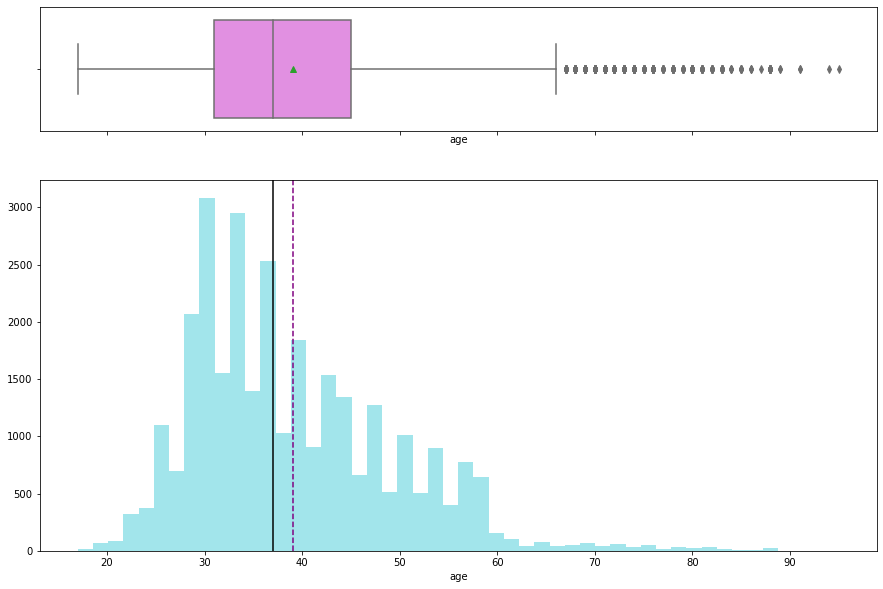

In [9]:
histobox(bankData.age)

We then investigated the **pdays** variable. As a reminder, this variable tracks the number of days that have lapsed since the subject was last contacted, and a value of 999 denotes that the subject has not been contacted before. From the basic statistics, we saw indication of heavy skewness. We then visually plotted this variable to get a better understanding. In order to make the data more interpretable, we performed a log transformation on the Y-Axis and adjusted the X-Axis. From the resulting plot, there is overwhelming evidence to suggest that a heavy majority of the sample population are new prospective applicants for long term deposits, but if subjects are repeatedly contacted, then the longest time between contacts is 27 days.  

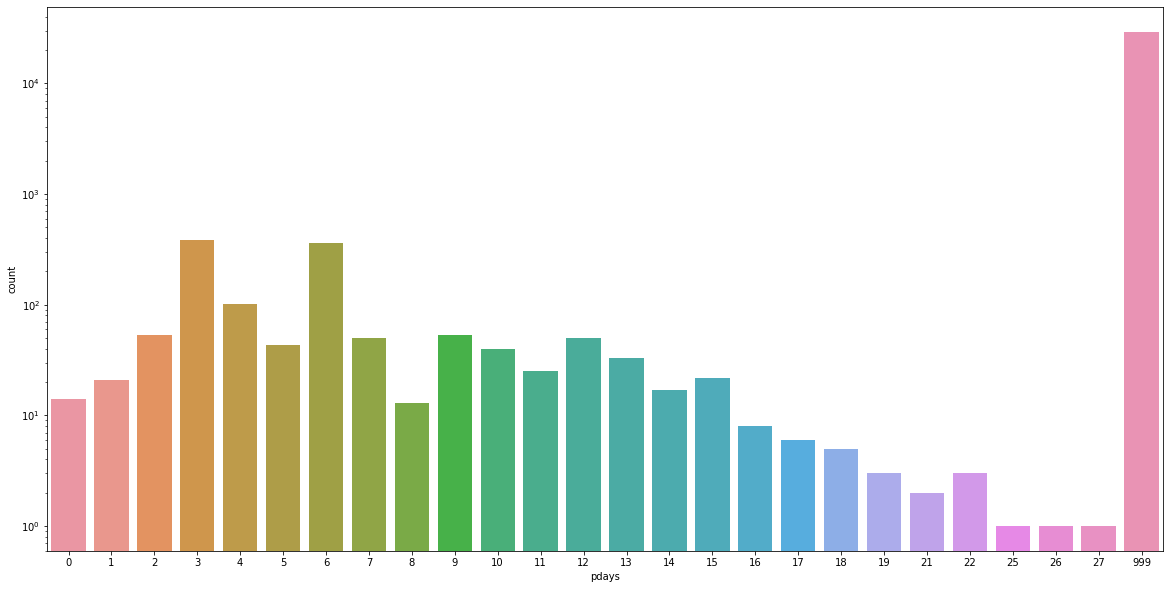

In [10]:
sns.countplot(bankData.pdays).set_yscale("log")

The following cell contains commented code for producing histograms and boxplots for all continuous variables

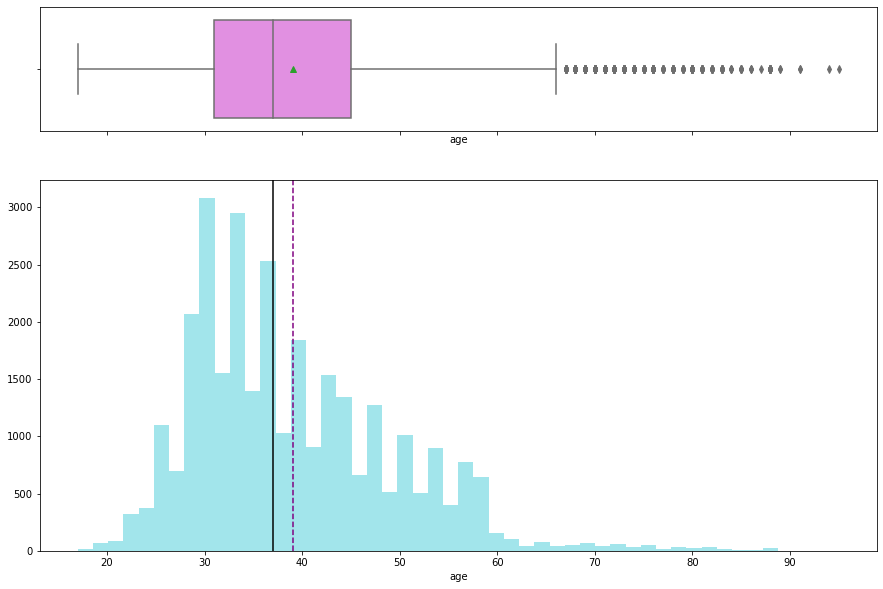

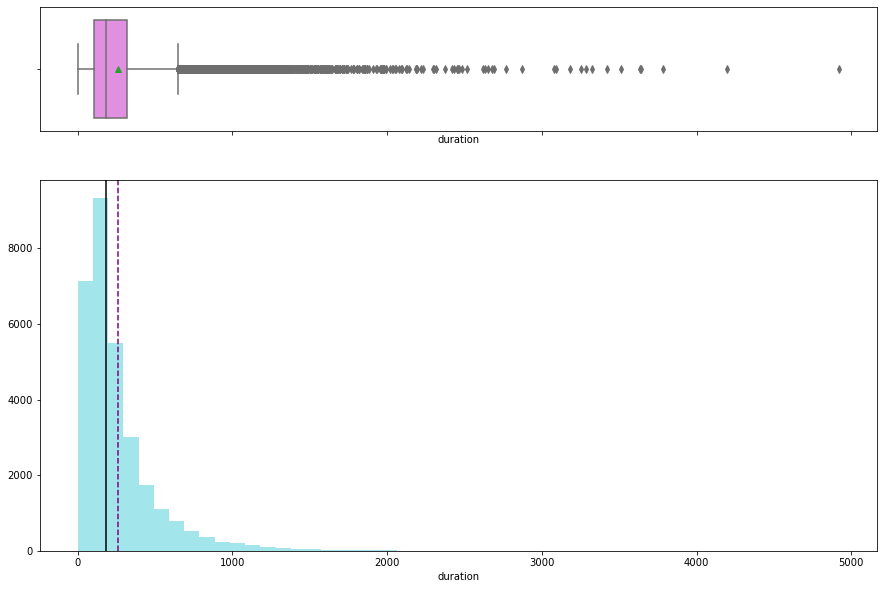

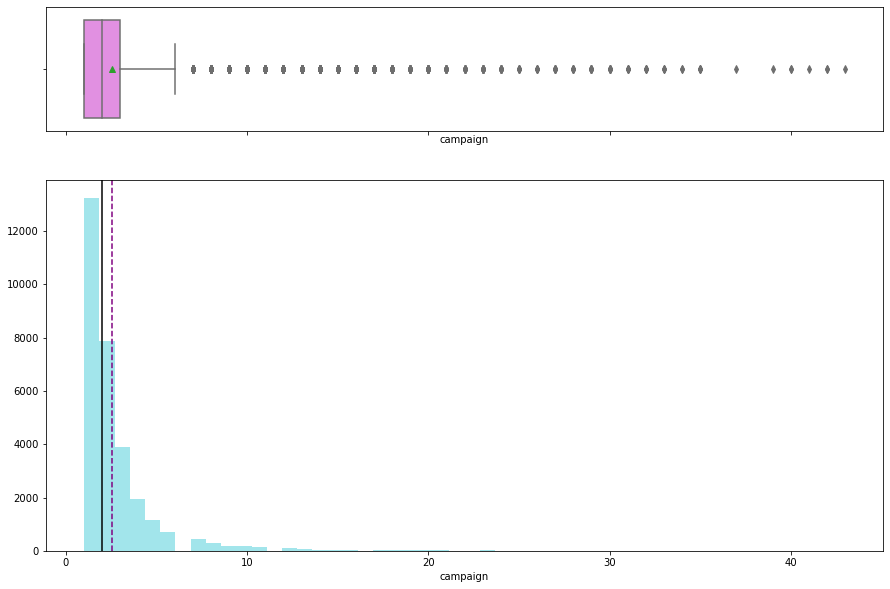

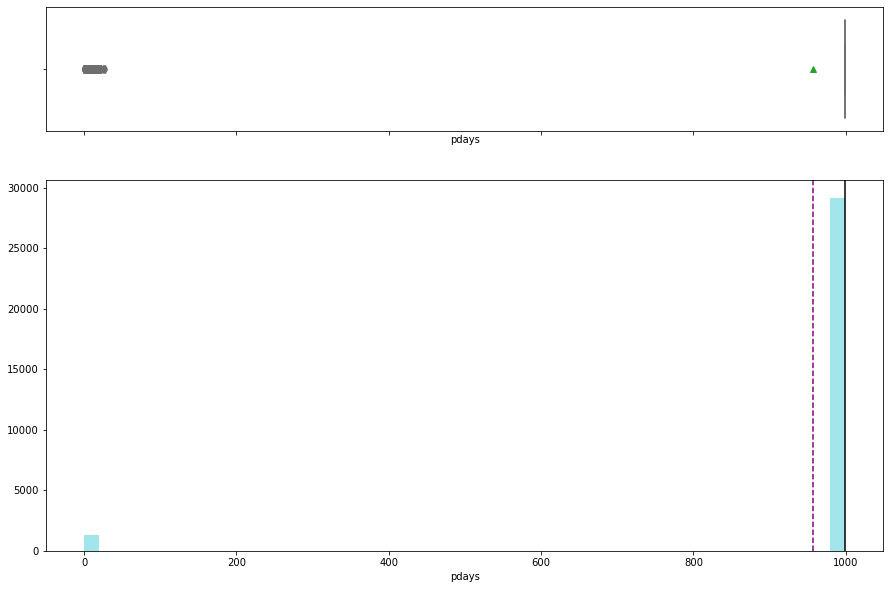

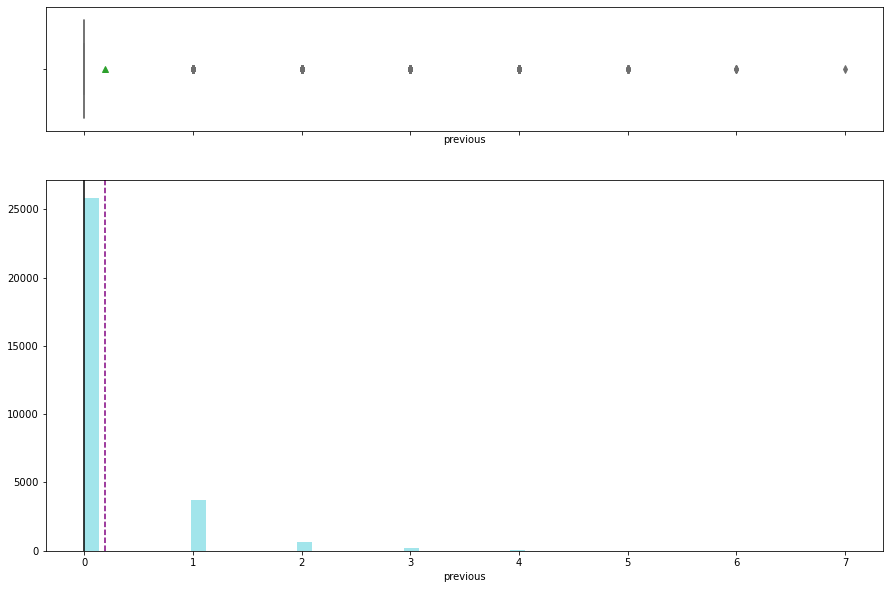

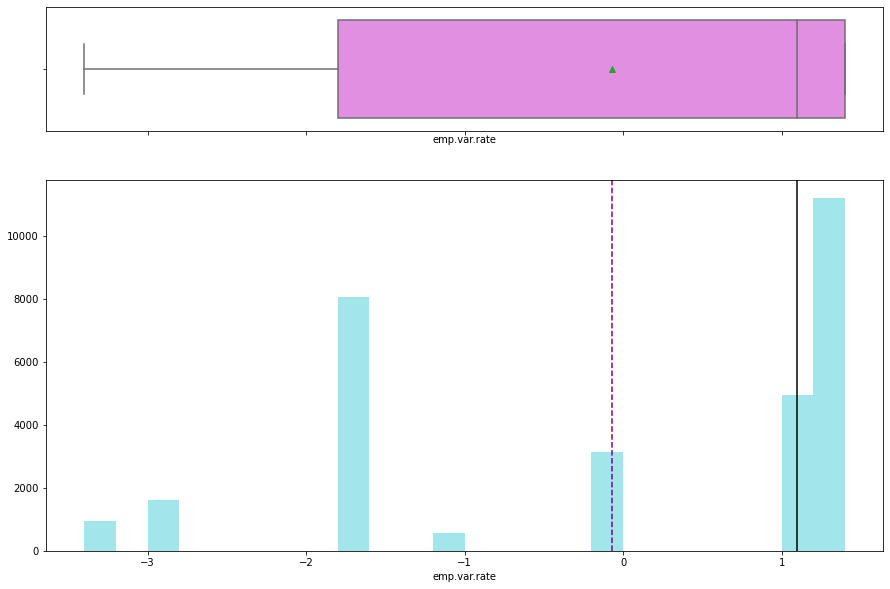

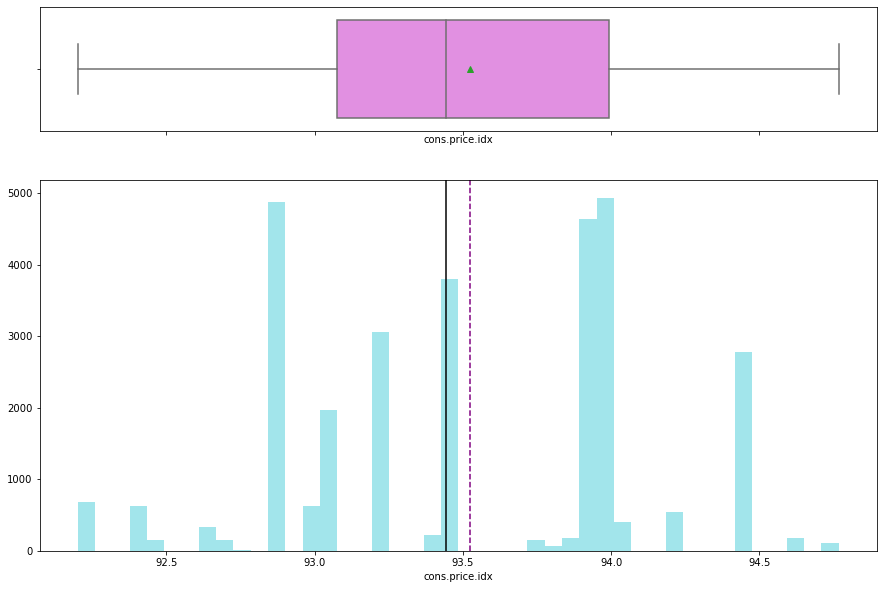

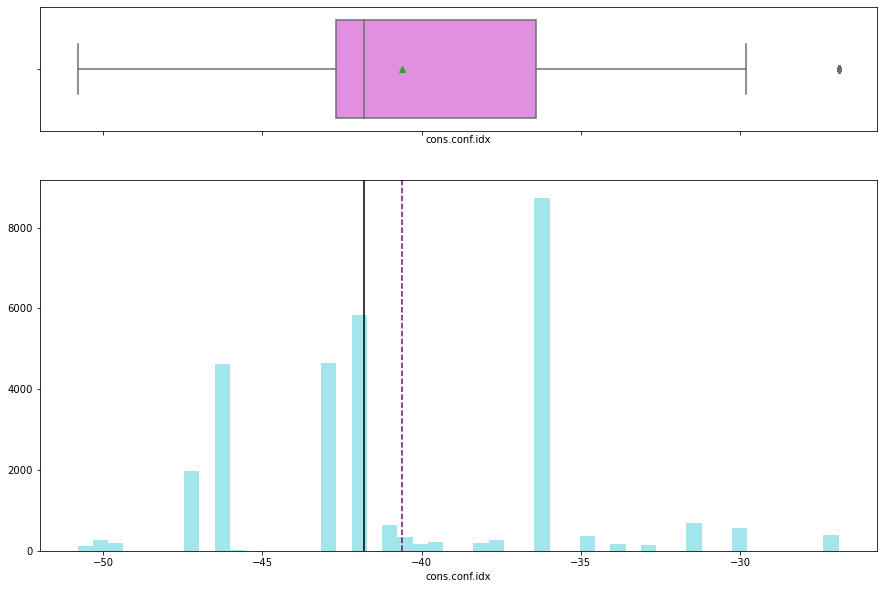

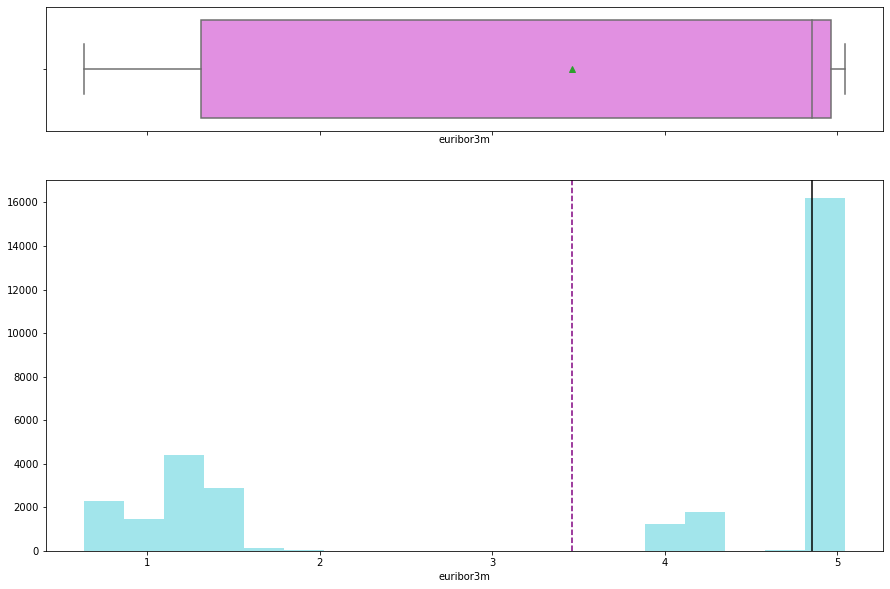

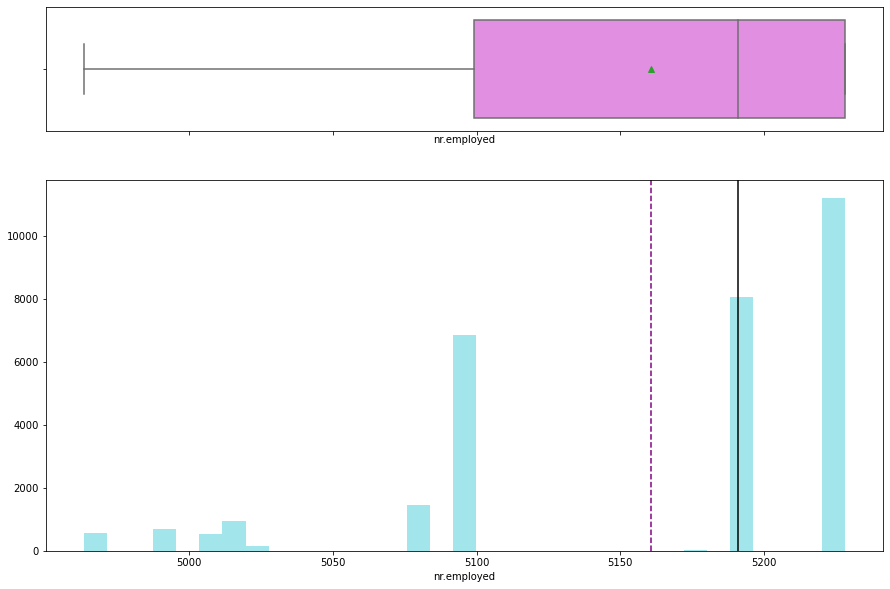

In [13]:
for i in conCol:
    histobox(bankData[i])

### Categorical Variable Univariate Analysis

Below are count plots that were created using the above function "perc_on_bar". The function displays the different levels of the called categorical variable and plots the count as a bar and percentage that corresponds to the level on top of the bar. The visual provides the same information that a value count table would but offers a more dramatic perspective on the differences and possible skewness of the categorical variables. 

Categorical data provided us with a bit more insight. To begin, we examined the distribution of the **Job**. Admin, Blue-Collar, and Technician jobs contains 64.2% of respondants. This would suggest that the bank targeted people who have, what are assumed to be, higher paying ans stable jobs. Unemployed people and students both had the lowest percentage of targeted marketing campaigns, with only 2%. There is visual evidence to suggest that ANOVA can be performed to distiguish differences between levels.

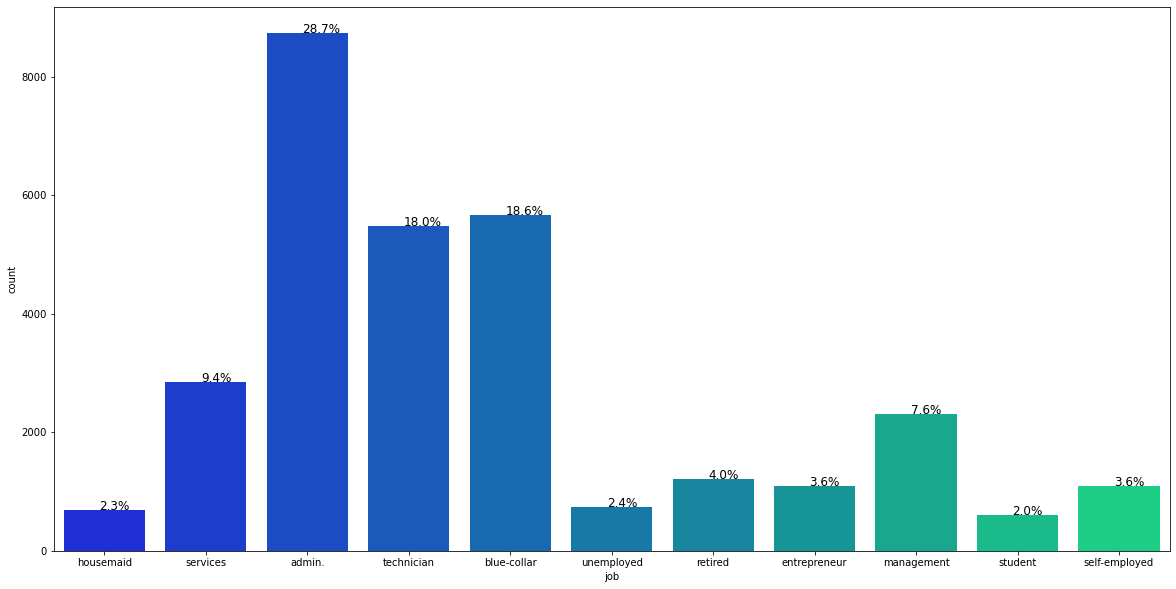

In [14]:
ax = sns.countplot(bankData['job'],palette='winter')
perc_on_bar(ax,bankData['job'])

Like **job**, the **marital** variable also provided somewhat interesting insight on the targeted subjects. Over 57% of the subjects were identified to be married. Further review in the bivariate analysis can help identify possible correlations between a married status and other categorical vairbles like **education** or **job**. However, intuition would suggest that a majority of the working class is likely also married with a family. Again, this will need to be furthered reviewed.

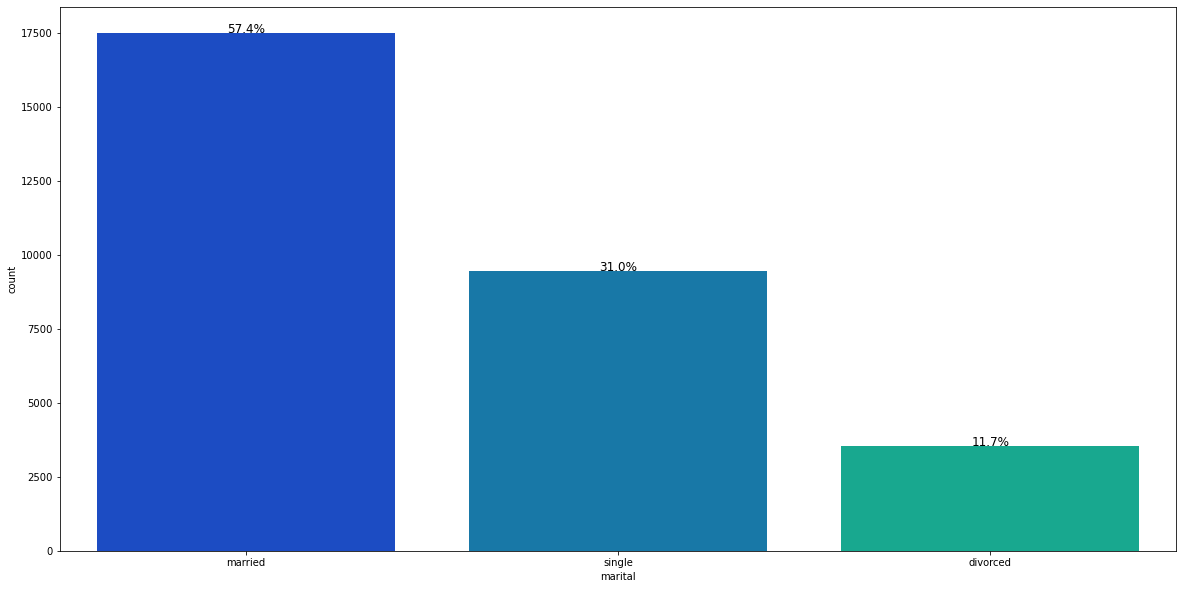

In [15]:
ax = sns.countplot(bankData['marital'],palette='winter')
perc_on_bar(ax,bankData['marital'])

Finally, we focused our initial review on the **education** variable using the same "prec_on_bar" plot function. Even without ordering the x-axis of the plot, it is obvious that there is a skewness to the data. Those with more education were targeted more often with a campaign compared to those subjects with less education. More specifically, subjects with at least a high school education accounted for 59.5% of the sample popluation. 

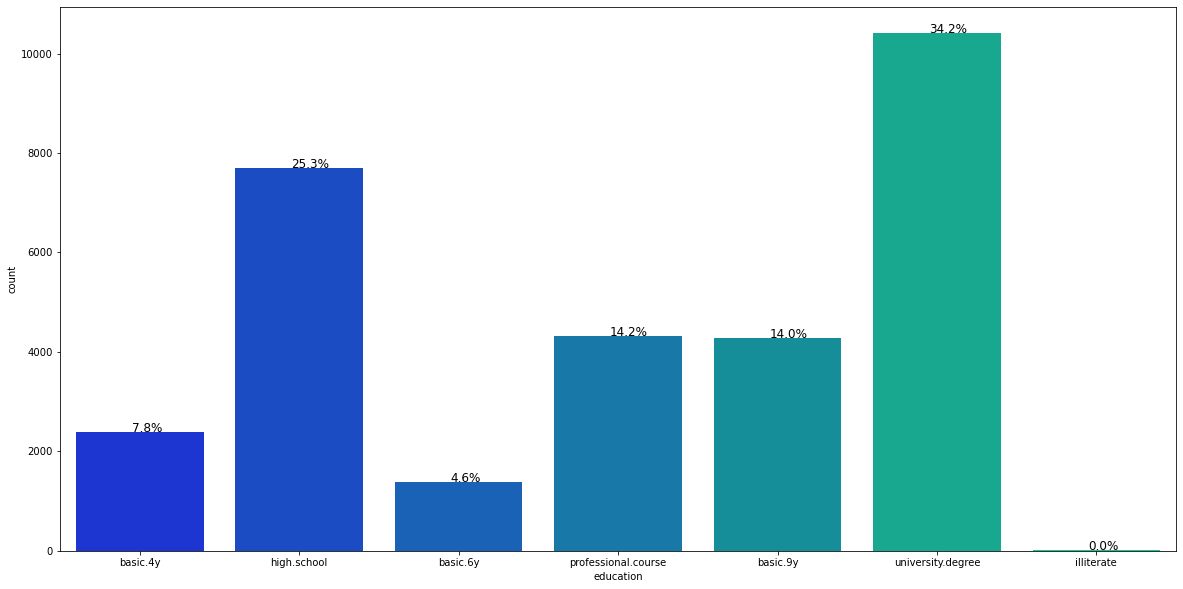

In [16]:
ax = sns.countplot(bankData['education'],palette='winter')
perc_on_bar(ax,bankData['education'])

The following cell contains commented code for producing count plots with percetages above for all categorical variables. 

In [ ]:
# for i in catCol:
#     ax = sns.countplot(bankData[i],palette='winter')
#     perc_on_bar(ax,bankData[i])

## Explore Joint Attributes

#### Visualize relationships between attributes: Look at the attributes via scatter plots, correlation, cross-tabulation, group-wise averages, etc. as appropriate. Explain any interesting relationships.

The following is a heatmap of the continuous variables. From this map, we saw strong indications of correlations between the **euribor3m** variable and the **previous**, **emp.var.rate**, and **nr.employed** variables. There was also evidence of higher correlations between the **previous** variable and the **pdays** and **emp.var.rate** variables. 

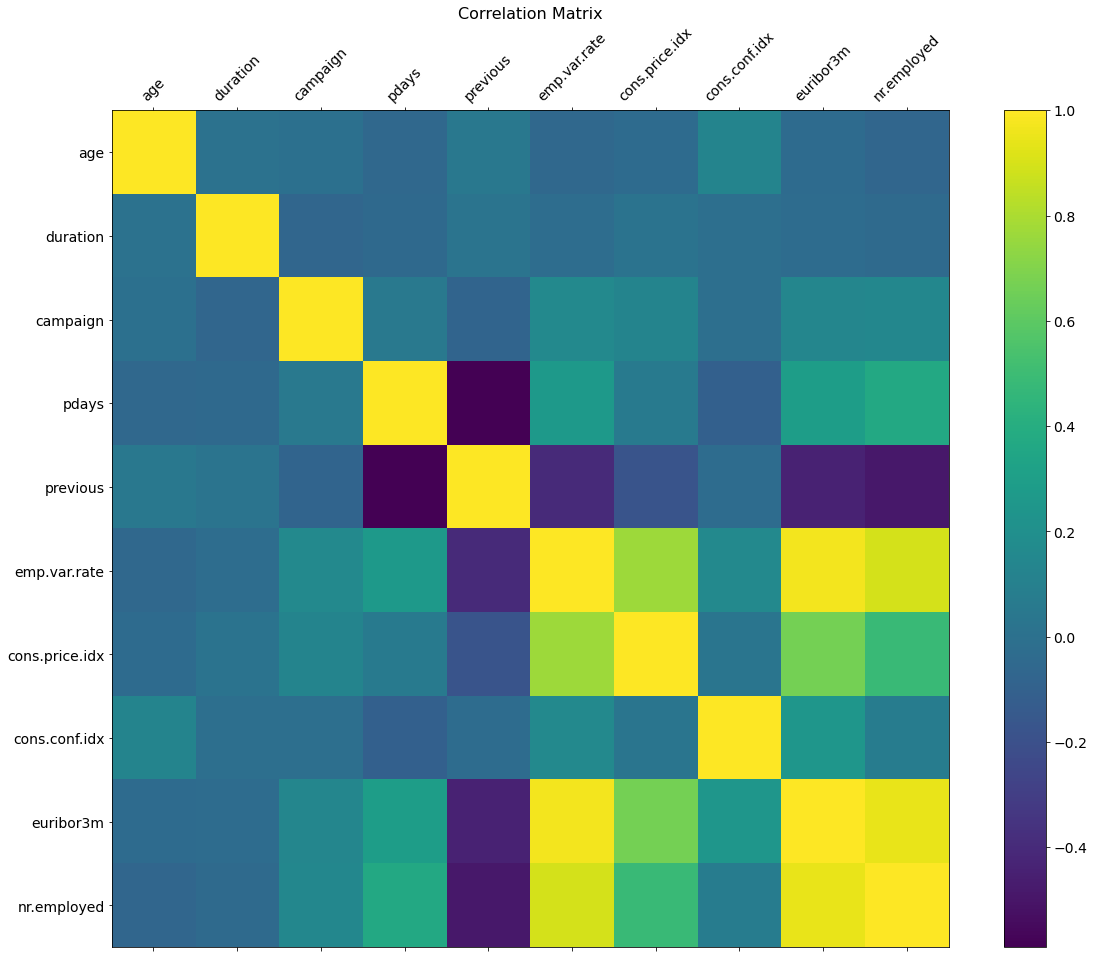

In [17]:
df = bankData
def heatMap(data, figsize=(20,15)):
    #establish figure size
    f = plt.figure(figsize=(20, 15))
    
    #heatmap conversion
    plt.matshow(data.corr(), fignum=f.number)
    
    #Change axis bars and labels
    plt.xticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
    plt.yticks(range(data.select_dtypes(['number']).shape[1]), data.select_dtypes(['number']).columns, fontsize=14)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16);

heatMap(bankData)

After plotting each continuous variable in a pair plot grid, as seen below, we could not find enough evidence to suggest colinearity between the continuous variables. The only variable that would justify further investigation would be **duration**, but we have already determined that this variable should be excluded.

In [ ]:
sns.pairplot(bankData[conCol])

We then decided to investigate the categorical variables as well through hot encoding the variables to distinguish individual relationships and correlations between levels. From the resulting plot below, we found no indications of concern between any of the levels. 

In [ ]:
#one hot encoding of ALL categorical variables
# pd.concat([*]], axis=1) // this line of code concatenates all the data frames in the [*] list
# [** for col in categ_features] // this steps through each feature in categ_features and 
#                                //   creates a new element in a list based on the output of **
# pd.get_dummies(df_imputed[col],prefix=col) // this creates a one hot encoded dataframe of the variable=col (like code above)

categ_features = ['job','marital','education','default','housing','loan','contact','month','poutcome'];

OneHotDF = pd.concat([pd.get_dummies(bankData[col],prefix=col,drop_first=True) for col in categ_features], axis=1)

OneHotDF.head()

#Code obtained from: https://github.com/jakemdrew/DataMiningNotebooks/blob/master/01.%20Pandas.ipynb

#Merged OneHotDF and bankData

mergedDF = pd.concat([bankData.select_dtypes(exclude='object'),OneHotDF],axis=1)

heatMap(mergedDF, figsize=(28,20))

As referenced in the univariate analysis of the categorical variables, there was evidenece to suggest some amount of correlation between **job**, **marital**, and **education**. The count plots below are bivariate with combinations of the mentioned categorical variables. The **marital** (x-axis) status by **job** (color) plot showed correlation between married individuals and jobs that were assumed to be higher paying. **Education** by **job** revealed that highschool and college grads had the highest amount of subjects with admin job titles, providing evidenece that the higher paying jobs were held by indivduals with higher education levels. Finally, **education** by **marital** showed that no matter what the education level, most subjects were indeed married.

<AxesSubplot:xlabel='education', ylabel='count'>

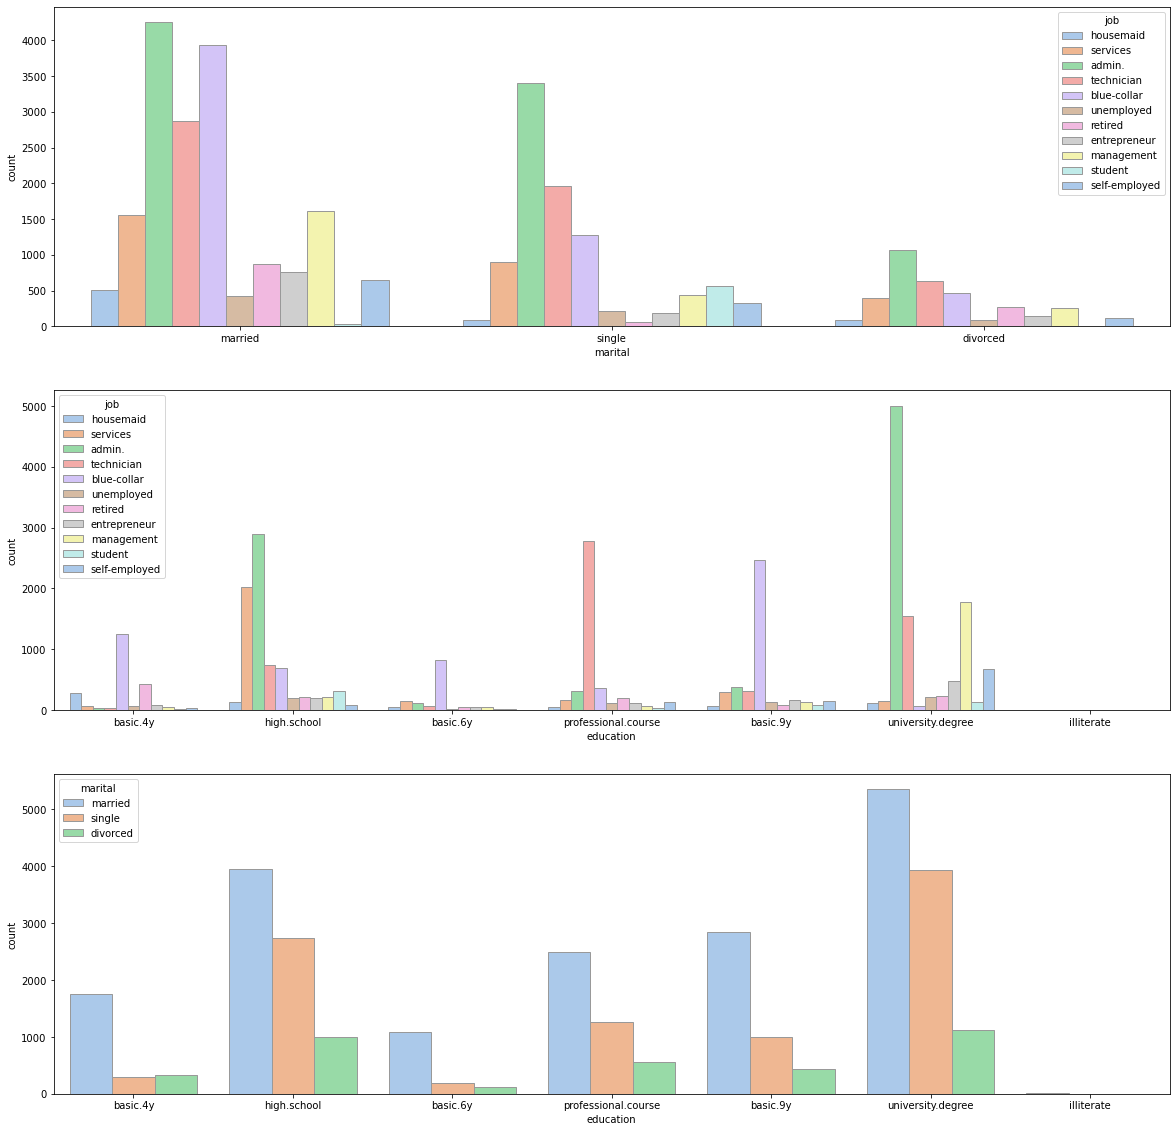

In [18]:
plt.rcParams["figure.figsize"] = (20,20)
fig, (MJ, EJ, EM) = plt.subplots(nrows=3)

sns.countplot(
    data=bankData, x="marital", hue="job",
    palette="pastel", edgecolor=".6",
    ax=MJ
)
sns.countplot(
    data=bankData, x="education", hue="job",
    palette="pastel", edgecolor=".6",
    ax=EJ
)
sns.countplot(
    data=bankData, x="education", hue="marital",
    palette="pastel", edgecolor=".6",
    ax=EM
)

## Explore Attributes and Class

#### Identify and explain interesting relationships between features and the class you are trying to predict (i.e., relationships with variables and the target classification).

In [19]:
# Function to plot stacked bar chart w/ totals above
# stacked bar chart will be used for categorical variables
# Will be comparing all significant variables to ProdTaken/ProductPitched with boxplots next
def stacked_plot(x):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,bankData['y'],margins=True)
    df1 = pd.DataFrame(tab1)
    df1['% Yes'] = round((df1.yes/df1.All)*100,2)
    df1 = df1.sort_values(by='All', ascending=False)
    print(df1)
    print('-'*100)
    tab = pd.crosstab(x,bankData['y'],normalize='index')
    tab = tab.sort_values(by='no', ascending=True)
    tab.plot(kind='bar',stacked=True,figsize=(15,5))
    #plt.legend(loc='lower left', frameon=False)
    #plt.legend(loc="upper left", bbox_to_anchor=(0,1))
    plt.legend(loc='upper right',bbox_to_anchor=(1.1, 1))
    plt.show()



In reference to the table and plot below, there was evidence to suggest differences between levels for job. We saw that Retired subjects and Students were more likely to subscribe to a long term deposit, however their population size was drastically smaller. Practically speaking, it may make financial sense for these two groups to have had a higher rate for subscribing. This could be explained as neither having had a consistent and secure income, so both groups may have had a higher chance of seeking indirect income sources. 

y            no   yes    All  % Yes
campaign                           
All       26629  3859  30488  12.66
1         11326  1920  13246  14.49
2          6853  1020   7873  12.96
3          3428   477   3905  12.22
4          1737   200   1937  10.33
5          1055   101   1156   8.74
6           643    53    696   7.61
7           410    30    440   6.82
8           268    15    283   5.30
9           181    14    195   7.18
10          154    10    164   6.10
11          114    10    124   8.06
12           87     2     89   2.25
13           53     1     54   1.85
14           47     1     48   2.08
17           37     4     41   9.76
15           30     0     30   0.00
16           30     0     30   0.00
18           23     0     23   0.00
20           21     0     21   0.00
19           18     0     18   0.00
23           13     1     14   7.14
21           14     0     14   0.00
24           11     0     11   0.00
22           11     0     11   0.00
29            8     0      8

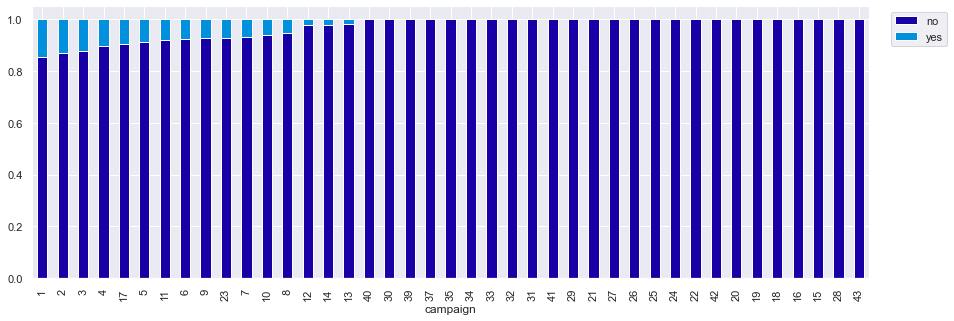

In [21]:
stacked_plot(bankData.campaign)

There was evidence to suggest differences between levels depending on the month contacted. After normalizing the scale to get percentages of each month, we found that December was the highest rate of sign ups, however it also had the lowest number of calls made. Amount of calls made in December was significantly less than any other month. Future exploration is needed to investigate if that is an anomly due to few data points. Spring and fall specifically March, September and October had close to 50% that **subscribed a term deposit**. All other months had less than 20% sign up with exception of April just above that.

In [ ]:
stacked_plot(bankData.month)

We continued the trend of plotting the subscription rates with the **contact**. We can see that subjects contacted via cellular devices are more likely to subscribe to a long term deposit at almost three times the rate (2.75). This could likely be due to the higher accessibility of cellular devices allowing a higher response rate based off the fact that cellular responses more than double that of the telephone responses. 

In [ ]:
stacked_plot(bankData.contact)

There was visual evidence to suggest that subjects that had previously subscribed to long term loans were almost 3 times more likely to subscribe to another long term loan. However, the number of success responses was drastically lower than the rest of the data set. Given that long term deposits are financial descisions that more often rely on long term commitment, this makes practical sense.

In [ ]:
stacked_plot(bankData.poutcome)

We then investigated continuous variables via distribution plots. We were unable to find any evidence of meaningful relationships that provide interpretibility not previously mentioned. However, the following cel provides the distribution plots for all continuous variables.

In [ ]:
# sns.set(rc={"figure.figsize": (10, 7)})
# for i in conCol:
#     plt.figure(i)
#     sns.displot(x=i, hue='y', data=bankData, kde=True ,fill=True,)

## New Features

#### Are there other features that could be added to the data or created from existing features? Which ones?

We created new features via hot encoding the categorical variables. This was used to generate a heat map of the correlation between all variables including those that are originally categorical.

The subject income was not given in the data set and it can be assumed that the response variable would have at least some level of correlation to a person's income. Along those same lines, knowing what the subject's **housing** or personal **loan** amount is could also provide valuable insight.



Another interesting idea involves knowing if the method of **contact** changed from the previous **contact** with the potential client. This would give insight as to whether a calling someone on a house phone or cell phone would impact the response variable.

## Exceptional Work

#### You have free reign to provide additional analyses. One idea: implement dimensionality reduction, then visualize and interpret the results.

We feel that our exceptional work is provided through our heatmap analysis of the correlation between all the variables. Not only did we use a heatmap to plot the correlation, but we also used hot encoding on the categorical responses to help determine any colinearity between distinct levels of categorical levels.